In [2]:
import numpy as np
import math 
# from sympy import *
# from sympy.abc import x,y,X,Y
import random
# import operator
# import sys
# import pandas as pd
# import pickle
# import plotly.express as px
# %load_ext memory_profiler
# from sympy import Symbol 
# from sympy import MatrixSymbol, Matrix
# from collections import deque
# PRECISION = 6
# from multiprocessing import Pool
# from functools import partial
# import tqdm
# import time
import string
# import json
from matplotlib import pyplot as plt

In [3]:
def choose(n, k):
    if 0 <= k <= n:
        ntok = 1
        ktok = 1
        for t in range(1, min(k, n - k) + 1):
            ntok *= n
            ktok *= t
            n -= 1
        return ntok // ktok
    else:
        return 0

# SIMULATION 

## Bernoulli random variable 

In [4]:
# 1 denotes erasure and 0 denotes no erasure
def brv(p):
    tkn = np.random.uniform(0,1)
    if tkn <= p :
        return "1"
    else :
        return "0"

## Realizaton of a Gilbert-Elliot Channel 

In [5]:
# Let the markov chain initially be in good state
def mc_ge(a,b,e1,e2,TIME):
    rls = "g"
    ers_ptn = brv(e1)
    
    for t in range(1,TIME):
        pv_st = rls[t-1]
        tkn = np.random.uniform(0,1)
        if pv_st == "g":
            if tkn <= 1-a:
                rls += "g"
                ers_ptn += brv(e1)
            else :
                rls += "b"
                ers_ptn += brv(e2)                                
        else:
            if tkn <= 1-b:
                rls += "b"
                ers_ptn += brv(e2)                
            else :
                rls += "g"
                ers_ptn += brv(e1)
    return rls,ers_ptn

In [117]:
a = 0.1
b = 0.7
e1 = 0.05
e2 = 0.8
TIME = 100

rls,ers_ptn = mc_ge(a,b,e1,e2,TIME)
print("States: ",rls)
print("Erasure Pattern: ",ers_ptn)

States:  ggggggggbggggggbbgggggggbgggggggggbbgggggbgggggggggggbbggggggbggggggggggggbgggggbggggggbgggggggggggg
Erasure Pattern:  0000000010000001000000001001000010110000010000000000011000000100000000000010000010000001101000000000


# AoI calulation

In [120]:
# Number of Sources 
K = 50

# Note: Initially the channel is in good state!
a = 0
b = 1
e1 = 0.2
e2 = 0.5

# Round-Robin scheduling 
NUM_ROUNDS = 20
TIME = NUM_ROUNDS*K 

# Generating the erasure pattern and the channel realization
rls,ers_ptn = mc_ge(a,b,e1,e2,TIME)

In [121]:
TIME

1000

## No Coding

In [122]:
# u: time-stamp and the latest recieved packet
u = {}
for k in range(K):
    u[k] = []  
for t in range(0,TIME):
    src = t%K 
    if ers_ptn[t] == "0":
        u[src].append((t,t+1))

In [124]:
ers_ptn

'110001000010010001001010100001000100100000000001000000000000000000010010000000001000000001000011001100000000000110000101001100000000001001000000000010000000000000100010000001100000000010000000100000000000111000001100000001000010000100010100000100010100010101000010000001000000100100010000001001000001001000000000000001000000000010000011001000010011000010000010010000001000000000000000001100100000011101000110100001000000100010000000000000010000100000110100010000000000010001000010000000000001000010000001000010000010001000010001100000000001000000001010100000010000100000100000000100000001000001000000000001011001001000100000000000100110001000010000001000110000110000001100000000011001000110010000000000000010000010000000000000000100000000000000000000000000000000000100010000001000000000000100000100000010000100000010000100000111000010000000100001000000000010000001010001100001110000000001000110011001000101000000011000000001110010000000100000000110010000000100000001010010000000010000010010000100000

In [123]:
u[0]

[(50, 51),
 (100, 101),
 (150, 151),
 (200, 201),
 (250, 251),
 (300, 301),
 (350, 351),
 (400, 401),
 (500, 501),
 (600, 601),
 (700, 701),
 (750, 751),
 (800, 801),
 (850, 851),
 (900, 901),
 (950, 951)]

In [126]:
# Instantaneous Age
delta = {}
for k in range(K):
    time_stamps = [i[0] for i in u[k]]
    rec_packs = [i[1] for i in u[k]]
    delta[k] = []
    time = time_stamps[0]+1
    for i in range(1,len(time_stamps)):
        crn_time_stamp = time_stamps[i-1]
        fut_rec_pack = rec_packs[i]
        while (time<fut_rec_pack):
            delta[k].append((time,time-crn_time_stamp))
            time+= 1
        

In [127]:
delta[0]

[(51, 1),
 (52, 2),
 (53, 3),
 (54, 4),
 (55, 5),
 (56, 6),
 (57, 7),
 (58, 8),
 (59, 9),
 (60, 10),
 (61, 11),
 (62, 12),
 (63, 13),
 (64, 14),
 (65, 15),
 (66, 16),
 (67, 17),
 (68, 18),
 (69, 19),
 (70, 20),
 (71, 21),
 (72, 22),
 (73, 23),
 (74, 24),
 (75, 25),
 (76, 26),
 (77, 27),
 (78, 28),
 (79, 29),
 (80, 30),
 (81, 31),
 (82, 32),
 (83, 33),
 (84, 34),
 (85, 35),
 (86, 36),
 (87, 37),
 (88, 38),
 (89, 39),
 (90, 40),
 (91, 41),
 (92, 42),
 (93, 43),
 (94, 44),
 (95, 45),
 (96, 46),
 (97, 47),
 (98, 48),
 (99, 49),
 (100, 50),
 (101, 1),
 (102, 2),
 (103, 3),
 (104, 4),
 (105, 5),
 (106, 6),
 (107, 7),
 (108, 8),
 (109, 9),
 (110, 10),
 (111, 11),
 (112, 12),
 (113, 13),
 (114, 14),
 (115, 15),
 (116, 16),
 (117, 17),
 (118, 18),
 (119, 19),
 (120, 20),
 (121, 21),
 (122, 22),
 (123, 23),
 (124, 24),
 (125, 25),
 (126, 26),
 (127, 27),
 (128, 28),
 (129, 29),
 (130, 30),
 (131, 31),
 (132, 32),
 (133, 33),
 (134, 34),
 (135, 35),
 (136, 36),
 (137, 37),
 (138, 38),
 (139, 39),

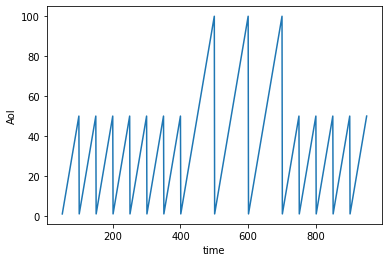

In [129]:
x = []
y = []
src = 0
for i in range(len(delta[src])):
    x.append(delta[src][i][0])
    y.append(delta[src][i][1])
plt.plot(x,y,"-")
plt.xlabel("time")
plt.ylabel("AoI")
plt.show()

In [142]:
u[0][0][0]

50

In [141]:
peak = 0
cnt = 0
for k in range(K):
    for i in range(len(u[k])):
        print
        peak+=delta[k][u[k][i][0]-u[k][0][0]]
        cnt+=1 

TypeError: unsupported operand type(s) for +=: 'int' and 'tuple'

In [57]:
AoI = {}
AoI_sys = 0
cnt = 0
for k in range(K):
    if (delta[k]):
        cnt += 1 
        x = []
        y = []
        for i in range(len(delta[k])):
            x.append(delta[k][i][0])
            y.append(delta[k][i][1])
        AoI[k] = np.trapz(y,dx=1)/len(x)
        AoI_sys += AoI[k]
AoI_sys /= cnt

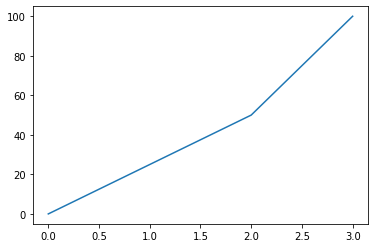

In [138]:
plt.plot([0,25,50,100])

In [136]:
np.trapz([0,25,50,100],dx=1)

125.0

In [58]:
AoI_sys

121.81686265497405

In [59]:
AoI_sys_th = (K/2)*((1+e1)/(1-e1)) + 1
AoI_sys_th

142.66666666666666

## MDS Code 

In [102]:
# dim = 12
n = 10
# dim = math.floor(n - n*e1)-1
dim = 6
R = dim/n
NUM_BLOCKS = (int) (TIME/n)
BLOCK_FAILURE = np.zeros((NUM_BLOCKS))

for CRNT_BLOCK in range(NUM_BLOCKS):
    cnt = 1 
    ers_cnt = 0 
    while cnt<=n:
        t = CRNT_BLOCK*n + cnt-1
        if ers_ptn[t] =="1":
            ers_cnt +=1  
        cnt+=1         
    if ers_cnt > (n-dim):
        BLOCK_FAILURE[CRNT_BLOCK] = 1

In [103]:
dim

6

In [104]:
BLOCK_FAILURE[0:22]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.])

In [105]:
src = 0
cnt = 0
t = 0
trans = []
while t<TIME:
    cnt +=1 
    if src==K:
        src=0
    trans.append((t,src))
    if cnt==dim:
        cnt=0 
        t+=n-dim
    
    src+=1
    t+=1   

In [106]:
# u: time-stamp and the latest recieved packet
u = {}
for k in range(K):
    u[k] = []  
    
BLOCK_NUM = -1   
for t in trans:
    time = t[0]
    src = t[1]
    if time%n==0:
        BLOCK_NUM+=1
    POS_IN_BLOCK = time%n
    if ers_ptn[time] == "0":
        u[src].append((time,time+1))
    elif ers_ptn[time] == "1" and BLOCK_FAILURE[BLOCK_NUM] == 0:
        u[src].append((time,time+n-POS_IN_BLOCK))
        

In [112]:
# Instantaneous Age
delta = {}
for k in range(K):
    if (len(delta[k])):
        time_stamps = [i[0] for i in u[k]]
        rec_packs = [i[1] for i in u[k]]
        delta[k] = []
        time = time_stamps[0]+1
        for i in range(1,len(time_stamps)):
            crn_time_stamp = time_stamps[i-1]
            fut_rec_pack = rec_packs[i]
            while (time<fut_rec_pack):
                delta[k].append((time,time-crn_time_stamp))
                time+= 1  

KeyError: 0

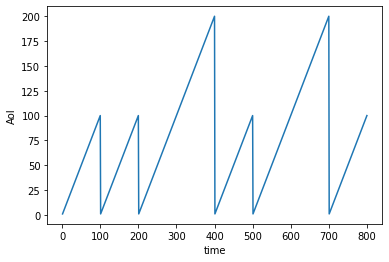

In [90]:
x = []
y = []
src = 0
for i in range(len(delta[src])):
    x.append(delta[src][i][0])
    y.append(delta[src][i][1])
plt.plot(x,y,"-")
plt.xlabel("time")
plt.ylabel("AoI")
plt.show()

In [91]:
AoI = {}
AoI_sys = 0
cnt = 0
for k in range(K):
    if (delta[k]):
        cnt += 1 
        x = []
        y = []
        for i in range(len(delta[k])):
            x.append(delta[k][i][0])
            y.append(delta[k][i][1])
        AoI[k] = np.trapz(y,dx=1)/len(x)
        AoI_sys += AoI[k]
AoI_sys /= cnt

In [92]:
AoI_sys

148.23591427254286

In [93]:
phi = 0
for i in range(n-dim):
    phi += choose(n-1,i)*(e1**i)*((1-e1)**(n-1-i))
pf = 1 -((1-e1)+e1*phi)

AoI_sys_th = (K/(2*R))*((1+pf)/(1-pf)) + (R/K)*(((1-e1)*(e1*phi)*((n-1)**2))/(1-pf))
AoI_sys_th

In [94]:
AoI_sys_th = (K/(2*R))*((1+pf)/(1-pf)) + (R/K)*(((1-e1)*(e1*phi)*((n-1)**2))/(1-pf))
AoI_sys_th

220.92633274904335

In [95]:
(R/K)*(((1-e1)*(e1*phi)*((n-1)**2))/(1-pf))

0.045527893260133984

# Analytical expressions

In [46]:
K = 10000
e1 = 0.4
n = 1000
dim = math.floor(n-n*e1+1)

In [48]:
AoI_sys_th_uncoded = []
pf_list = []
R_list = []
AoI_sys_th_coded = []
for dim in range(2,n+1):
    print(dim)
    R = dim/n
    phi = 0
    for i in range(n-dim):
        phi += choose(n-1,i)*(e1**i)*((1-e1)**(n-1-i))
    pf = 1 -((1-e1)+e1*phi)
    pf_list.append(pf)
    R_list.append(R)
    AoI_sys_th_coded.append((K/(2*R))*((1+pf)/(1-pf)))
    AoI_sys_th_uncoded.append((K/(2))*((1+e1)/(1-e1)))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

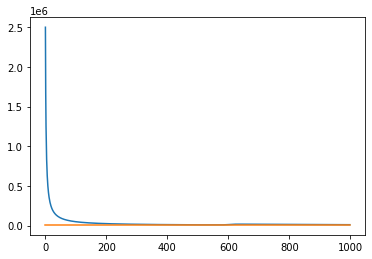

In [49]:
plt.plot(AoI_sys_th_coded)
plt.plot(AoI_sys_th_uncoded)
plt.show()

In [60]:
AoI_sys_th_coded[570]

8997.670507690054

In [61]:
AoI_sys_th_uncoded[0]

11666.666666666668

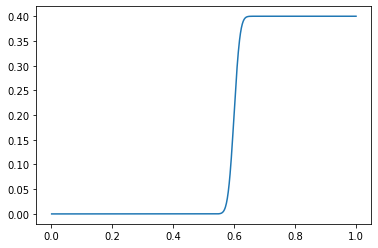

In [54]:
plt.plot(R_list,pf_list)

In [66]:
pf_list[500]

7.668277124395217e-11

In [70]:
(1+e1)/((1-e1)*2)

10500.0